In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [3]:
# Loading  all the dataset
metadata=pd.read_csv(".\\movies_metadata.csv")


C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# " Film Lovers are Sick People "<br><br> François Truffaut

### A Little Overview about Data

* The dataset files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. It consists of movies released on or before July 2017. This dataset captures feature points like cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts, and vote averages.
* The dataframe contains information about ~45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, genre, revenue, release dates, languages, production countries, and companies.

In [3]:
df = metadata.copy()
#show the head 
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
#get the shape of the dataframe
df.shape

(45466, 24)

In [5]:
#get some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
#there are NaN values in some features down here, we will deal with it later. 
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### IMDB Rating Based Recommandation System

A simple recommender system is a process in which we make recommendations of the top items based on a specific metric or score. In this section, we will build a simplified clone of IMDB Top 250 Movies using metadata collected from IMDB.

The following are the steps involved:


* Choose the metric/score to rate movies on.

* Compute the score for every movie.

* Sort the movies based on the score and output the top results.

In [7]:
#get the features of the datframe 
cols= list(df.columns)
print(cols)

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


#### 1. Choose the ranking score for the Movies:  
To do so, we will define the IMDB formula to use for computing the weighting rate as the score of a movie: <br><br>
WR == (v/(v+m) * R) + (m/(m+v) * C)<br><br>
with:<br><br>
v is the number of votes for the movie. <br>

m is the minimum votes required to be listed in the chart. <br>

R is the average rating of the movie. <br>

C is the mean vote across the whole report.<br>



#### 2. Compute the score for every movie:

In [8]:
#compute the parameters above:

## Calculate mean of vote average column
C = df['vote_average'].mean()
##Compute the minimum number of votes required to be in the chart, m
m = df['vote_count'].quantile(0.90)
#compute the avergage rating of the movie 
R = df['vote_average']
#compute vote count of the movie .
v= df['vote_count']

#define a function to compute the scores 
def get_weighting_rate(df,C=C,m=m):
    
    R = df['vote_average']
    v= df['vote_count']
    wr =  (v/(v+m) * R) + (m/(m+v) * C)
    return wr

#filtering the movies to be scored 
m_movies = df.loc[df['vote_count'] >= m]
# Compute the score for every movie in the dataset 

m_movies['score']=m_movies.apply(get_weighting_rate,axis=1)

#show the movie title and its score  
m_movies[['title','score']].head(10)
    

<ipython-input-8-801d453479c5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_movies['score']=m_movies.apply(get_weighting_rate,axis=1)


,title,score
0,Toy Story,7.640253
1,Jumanji,6.820293
4,Father of the Bride Part II,5.660700
5,Heat,7.537201
8,Sudden Death,5.556626
9,GoldenEye,6.483983
10,The American President,6.107000
11,Dracula: Dead and Loving It,5.664630
12,Balto,6.693333
15,Casino,7.567740


In [9]:
#now sort the movies by thier score 
m_movies = m_movies.sort_values('score', ascending=False)
#show the top 20 scored movies 
m_movies[['title','vote_count','vote_average','score']].head(20) 

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


Text(0.5, 1.0, 'Top Ten Movies')

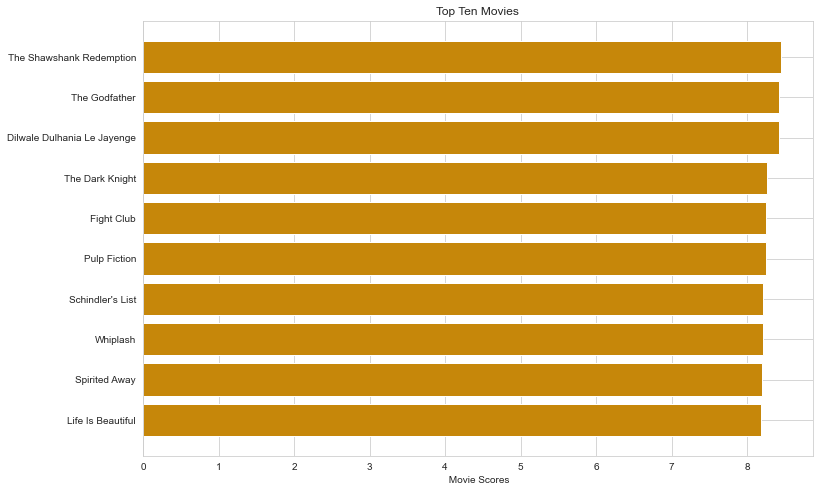

In [10]:

#plot the top twenty  movies as bar plot 
topten_scores=m_movies['score'].head(10) 
#get the titles 
topten_titles=m_movies['title'].head(10) 
#plot the top twenty movies 
sb.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.barh(topten_titles,topten_scores, align='center',color='#C6870A')
plt.gca().invert_yaxis()
plt.xlabel(" Movie Scores")
plt.title("Top Ten Movies")

### Content Based Recommandation System

In this part of the tutorial, we will be building a system that recommends movies which are similar to a particular movie considering its synopsis or plot description. To make this happen, we will compute pairwise cosine similarity scores for all movies based on their synopsis descriptions and recommend movies based on that similarity score threshold.<br>
The plot overview is available to you as the overview feature in your metadata dataset. Let's inspect the plots of a few movies

In [11]:
#Print plot overviews of the first 5 movies.
plots= df['overview']
plots.head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [12]:
plots.shape

(45466,)

Because the memory resources couldn't handle processing this big size of the movies dataset, we will reduce its length to 20000 rows only.


In [13]:
plots=plots[:20000]
plots.shape

(20000,)

Based on Natural Language Processing techniques, we need to extract some  of features from the plot texts  before we can compute the similarity  between them. To put it simply, it is not possible to compute the similarity between any two overviews in their raw forms. So it is very essensial to preprocess our plot descriptions before feeding the synopsis texts to a TF-IDF vectorizer. To do this, we need to compute the word vectors of each overview or document, as it will be called from now on.<br><br>






TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that frequently occur in plot overviews and, therefore, their significance in computing the final similarity score.


In scikit-learn library, there is a  built-in TfIdfVectorizer class that computes the TF-IDF matrix. So the processing will follow these steps :<br>
* A. Import the Tfidf vectorizer from scikit-learn;
* B. Preprocess the plots and remove the stopwords
* C. Impute empty or non relevant values with a blanks;
* D. Construct the TF-IDF matrix on the data.

In [14]:
#import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words. 
tfidf = TfidfVectorizer(stop_words='english')

#Imute NaN with an empty string
plots =plots.fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(plots)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(20000, 47487)

From the tfidf matrix above, we have 75,827 different vocabularies(words) in  20,000 movies. Now we will  compute the similarity score. There are several similarity metrics that you can use for this, such as the manhattan, euclidean, the Pearson, and the cosine similarity scores. 

For our case, we will use cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. 


Since we  used the TF-IDF vectorizer, calculating the dot product between each vector will directly give you the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

This would return a matrix of shape 45466x45466, which means each movie overview cosine similarity score with every other movie overview. Hence, each movie will be a 1x45466 column vector where each column will be a similarity score with each movie.

In [15]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#show the shape of cos_sim matrix 
cos_sim.shape

(20000, 20000)

In the Next step , we will define  a function that takes a movie title as an argument and returns a list of the 10 most similar movies based on their plots. First,  we will need to reverse mapping of movie titles and DataFrame indices. In other words, you need a mechanism to identify the index of a movie in your metadata DataFrame, given its title.

In [16]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df[:20000].index, index=df['title'][:20000]).drop_duplicates()
#show the some indices 
indices[:10]


title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

The next step is to define a function that recommends movies based on its content.Meaning, a functio that outputs a list of movies that are similiar in the synopsis. So let's follow the folowwong steps:

1. Get the index of the movie given its title.

2. Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position, and the second is the similarity score.

3. Sort the  list of tuples based on the similarity scores

4. Get the top 10 elements of this list. Ignore the first element as it refers to the movie itself.

5. Return the titles corresponding to the indices of the top elements.

In [17]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cos_sim=cos_sim):
    # Get the index of the movie that matches the title
    index = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [18]:
#get the recommandations of movies similar to the Dark Knight
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

We can see that from the synopsis based recommendations list above that our system gets the movies with similar plot descriptions, the quality of recommendations is not that great. But the recommander could be improved by trying other techniques in computing similarity or do more preprocessing in the texts. In the example above, "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. 

In [19]:
#get the recommandations of movies similar to the Godfather
get_recommendations('The Godfather')

1178      The Godfather: Part II
1914     The Godfather: Part III
11297           Household Saints
10821                   Election
17729          Short Sharp Shock
8653                Violent City
13177               I Am the Law
6711                    Mobsters
6977             Queen of Hearts
18224                  Miss Bala
Name: title, dtype: object

We you can notice from the recommanded list above, our system returns the top ten movies that are very related to gangsters and mobs plots, since the movie that we based our recommandations on belongs to this gangster and crime movie genre. 

In [20]:
#get the recommandations of movies similar to the Godfather
get_recommendations('Toy Story')

15348               Toy Story 3
2997                Toy Story 2
10301    The 40 Year Old Virgin
8327                  The Champ
1071      Rebel Without a Cause
11399    For Your Consideration
1932                  Condorman
3057            Man on the Moon
485                      Malice
11606              Factory Girl
Name: title, dtype: object